In [50]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('sentences.pkl', 'rb') as f:
    sentences = pickle.load(f)
prol = sentences[0]
proc = sentences[1]

In [33]:
from sklearn.model_selection import train_test_split
import keras

# num_words we use
num_words = 50000

# if we want two-sentence inputs
prol = [str(prol[k:k+1][0])+str(prol[k+1:k+2]) for k in range(len(prol))]
proc = [str(proc[k:k+1][0])+str(proc[k+1:k+2]) for k in range(len(proc))]

X = prol + proc
print(len(X))
print("num sentences total: ", len(X), "using {} words".format(num_words))


# prolife is zero prochoice is 1
Y = np.hstack((np.zeros(shape=len(prol)), np.ones(shape=len(proc))))

# split data into train and test set, and shuffle it
idx_train, idx_test, y_train, y_test = train_test_split(
                np.array([range(len(Y))]).T, Y, test_size=0.2, random_state=0)
idx_train = np.array(idx_train.T[0],dtype='int')
idx_test = idx_test.T[0]

92300
num sentences total:  92300 using 50000 words


In [34]:
X[90]

'I actually think your draft argument is the strongest one for a libertarian[" You are seeing it as analogous to the violation of the mother\'s bodily autonomy but I actually think it\'s a bit stronger when used as analogous to the violation of the child\'s, as in both cases it\'s the smaller, weaker party (one citizen vs govt) being sacrificed for the ostensible good of the larger organism"]'

In [43]:
# changes words to numbers
# tokenizing based on train data (i.e. will see new words in testset)
tokenizer = keras.preprocessing.text.Tokenizer(num_words=num_words, lower=True,
                                                filters='!""#$%&()*+,-./:;<=>?@[\]^_`{|}~ ”][',
                                               split=" ",oov_token=0)


tokenizer.fit_on_texts([X[k] for k in idx_train])
X2 = np.array(tokenizer.texts_to_sequences([X[k] for k in range(len(X))]))
x_train = X2[idx_train]
x_test = X2[idx_test]

In [44]:
print(X[90])
print(X2[90])

I actually think your draft argument is the strongest one for a libertarian[" You are seeing it as analogous to the violation of the mother's bodily autonomy but I actually think it's a bit stronger when used as analogous to the violation of the child's, as in both cases it's the smaller, weaker party (one citizen vs govt) being sacrificed for the ostensible good of the larger organism"]
[9, 139, 48, 35, 3579, 111, 6, 1, 4966, 59, 14, 3, 3224, 10, 15, 1099, 11, 22, 2990, 2, 1, 1471, 5, 1, 725, 206, 203, 23, 9, 139, 48, 46, 3, 569, 3084, 60, 260, 22, 2990, 2, 1, 1471, 5, 1, 1487, 22, 12, 193, 327, 46, 1, 3134, 7869, 577, 59, 4043, 918, 9293, 56, 6016, 14, 1, 27370, 131, 5, 1, 2246, 356]


In [7]:
# embeddings_index = {}
# maxlen = 100
# EMBEDDING_DIM = 100

# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))

# import os
# f = open(os.path.join('','glove.6B.100d.txt'))
# for line in f:
#     values = line.split()
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
# f.close()

Found 24382 unique tokens.


In [8]:
# from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional,CuDNNLSTM

# embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
# for word, i in word_index.items():
#     embedding_vector = embeddings_index.get(word)
#     if embedding_vector is not None:
#         # words not found in embedding index will be all-zeros.
#         embedding_matrix[i] = embedding_vector

# embedding_layer = Embedding(len(word_index) + 1,
#                             EMBEDDING_DIM,
#                             weights=[embedding_matrix],
#                             input_length=maxlen,
#                             trainable=False)

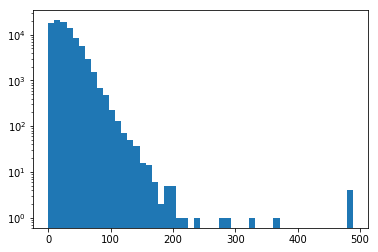

In [53]:
_ = plt.hist([len(x) for x in X2],  bins=50,log=True)

In [ ]:
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM,GRU, Bidirectional,CuDNNLSTM
from keras.datasets import imdb


# cut texts after this number of words
# (among top max_features most common words)
batch_size = 32


maxlen = 100
print('Loading data...')
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('removing len zero and len1 sentences...')

nonzero1 = x_train.sum(1)>1
x_train = x_train[nonzero1]
y_train = y_train[nonzero1]

print(len(x_train))
nonzero2 = x_test.sum(1)>1
x_test = x_test[nonzero2]
y_test = y_test[nonzero2]
print(len(x_test))

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)


model = Sequential()
model.add(Embedding(num_words, 50, input_length=maxlen))
model.add(Bidirectional(GRU(20)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=[x_test, y_test])


Loading data...
73838 train sequences
18460 test sequences
Pad sequences (samples x time)
removing len zero and len1 sentences...
73838
18460
x_train shape: (73838, 100)
x_test shape: (18460, 100)
Train...
Train on 73838 samples, validate on 18460 samples
Epoch 1/10
73838/73838 [==============================] - 270s 4ms/step - loss: 0.6395 - acc: 0.6258 - val_loss: 0.5911 - val_acc: 0.6766
Epoch 2/10
73838/73838 [==============================] - 295s 4ms/step - loss: 0.5165 - acc: 0.7410 - val_loss: 0.5749 - val_acc: 0.7054
Epoch 3/10
60256/73838 [=======================>......] - ETA: 45s - loss: 0.4311 - acc: 0.7907 ETA: 46s - loss: 0.43

In [63]:
example= ['I believe women should be able to choose their own fate they should not be restrained']
# prolife is zero prochoice is 1
ex = tokenizer.texts_to_sequences(example)
ex = np.array(sequence.pad_sequences(ex, maxlen=maxlen))
print(ex.shape)
print(model.predict(ex))

(1, 100)
[[0.89091283]]


In [68]:
example = ['abortion is wrong It should be made illegal']
ex = tokenizer.texts_to_sequences(example)
ex = np.array(sequence.pad_sequences(ex, maxlen=maxlen))
print(model.predict(ex))

[[0.3688292]]


## save model and tokenizer

In [ ]:
model.save('bilstm.h5')

In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # loading
# with open('tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)